In [2]:
!pip install scikit-learn

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
#import pickel

In [4]:
# Step 1: Load data
# Reading the CSV file into a pandas DataFrame
data = pd.read_csv("F:\\01. The Data Psychology\\4. New_Machine Learning\\4. Naive Bay's\\10.1. Placement Data.xls")

In [6]:
data.head()

,Unnamed: 0,grade,cgpa,iq,communication,technical_knowledge,placement
0,0,B,7.34,124,1,7,0
1,1,D,8.88,112,1,5,0
2,2,C,7.95,85,8,8,0
3,3,B,6.42,103,8,8,1
4,4,A,6.10,98,6,9,1


In [8]:
data = data.drop("Unnamed: 0", axis = 1)

In [9]:
data

,grade,cgpa,iq,communication,technical_knowledge,placement
0,B,7.34,124,1,7,0
1,D,8.88,112,1,5,0
2,C,7.95,85,8,8,0
3,B,6.42,103,8,8,1
4,A,6.10,98,6,9,1
...,...,...,...,...,...,...
495,B,6.47,116,7,10,1
496,B,6.51,126,8,9,1
497,A,8.04,116,3,6,1
498,D,7.68,91,5,5,0


In [10]:
# Step 2: Preprocess data
# Check for missing values
print("Missing values:\n", data.isnull().sum())

Missing values:
 grade                  0
cgpa                   0
iq                     0
communication          0
technical_knowledge    0
placement              0
dtype: int64


In [11]:
# Encode categorical variable 'grade'
le = LabelEncoder()
data['grade'] = le.fit_transform(data['grade'])

In [12]:
data['grade'] 

0      1
1      3
2      2
3      1
4      0
      ..
495    1
496    1
497    0
498    3
499    3
Name: grade, Length: 500, dtype: int32

In [14]:
data.head()

,grade,cgpa,iq,communication,technical_knowledge,placement
0,1,7.34,124,1,7,0
1,3,8.88,112,1,5,0
2,2,7.95,85,8,8,0
3,1,6.42,103,8,8,1
4,0,6.10,98,6,9,1


In [15]:
# Step 3: Perform exploratory data analysis (EDA)
# Display basic statistics
print("\nDataset Info:")
print(data.info())
print("\nBasic Statistics:")
print(data.describe())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   grade                500 non-null    int32  
 1   cgpa                 500 non-null    float64
 2   iq                   500 non-null    int64  
 3   communication        500 non-null    int64  
 4   technical_knowledge  500 non-null    int64  
 5   placement            500 non-null    int64  
dtypes: float64(1), int32(1), int64(4)
memory usage: 21.6 KB
None

Basic Statistics:
            grade        cgpa          iq  communication  technical_knowledge  \
count  500.000000  500.000000  500.000000     500.000000           500.000000   
mean     1.110000    7.007540  109.786000       5.344000             5.626000   
std      0.967353    1.006612   17.363848       2.852707             2.810324   
min      0.000000    4.300000   80.000000       1.000000             1.0

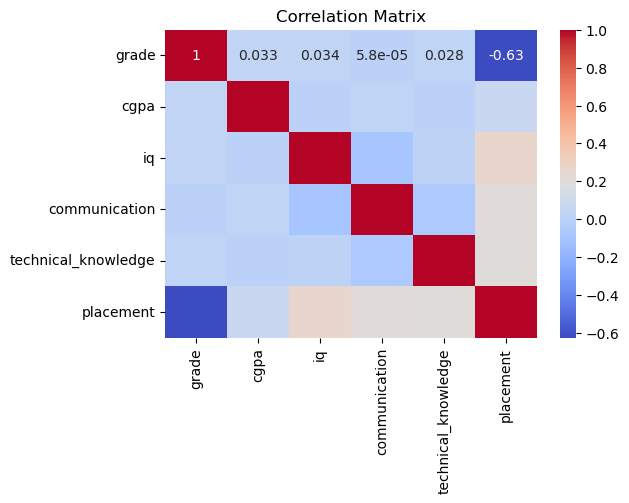

In [17]:
# Visualize correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.savefig('correlation_matrix.png')
#plt.close()
plt.show()


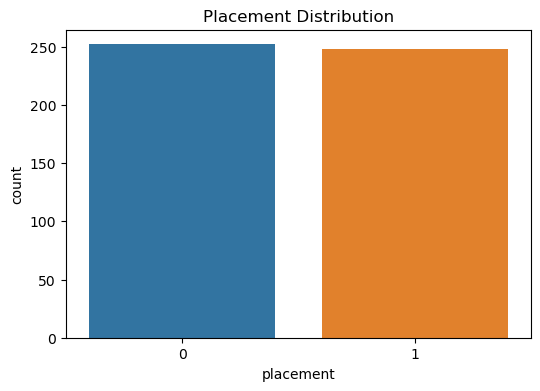

In [18]:
# Visualize placement distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='placement', data=data)
plt.title('Placement Distribution')
plt.savefig('placement_distribution.png')
#plt.close()
plt.show()

In [19]:
# Step 4: Transform data
# Define features (X) and target (y)
X = data.drop('placement', axis=1)
y = data['placement']

In [20]:
X

,grade,cgpa,iq,communication,technical_knowledge
0,1,7.34,124,1,7
1,3,8.88,112,1,5
2,2,7.95,85,8,8
3,1,6.42,103,8,8
4,0,6.10,98,6,9
...,...,...,...,...,...
495,1,6.47,116,7,10
496,1,6.51,126,8,9
497,0,8.04,116,3,6
498,3,7.68,91,5,5


In [21]:
y

0      0
1      0
2      0
3      1
4      1
      ..
495    1
496    1
497    1
498    0
499    0
Name: placement, Length: 500, dtype: int64

In [22]:
# Step 5: Split data into training and testing sets
# Using 80-20 split for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 5), (100, 5), (400,), (100,))

In [24]:
# Scale numerical features
scaler = StandardScaler()
x_train_scale = scaler.fit_transform(X_train)
x_test_scale = scaler.transform(X_test)

In [25]:
x_train_scale

array([[ 0.91303697, -1.64276431,  1.18743074, -1.51953767,  1.19880545],
       [-1.14451114,  1.07436486, -1.66683005,  0.57397003,  0.48997739],
       [-1.14451114,  0.62483981,  0.31367744, -1.51953767, -0.92767872],
       ...,
       [-0.11573708,  1.03440708, -0.09407411,  0.92288798,  0.84439142],
       [ 0.91303697,  1.41400601,  0.37192766, -0.12386587,  1.19880545],
       [-0.11573708,  1.69371048, -1.08432785, -1.51953767,  0.84439142]])

In [26]:
x_test_scale

array([[-0.11573708, -0.75370366,  0.08067656, -0.47278382,  0.13556337],
       [ 0.91303697, -1.19323926,  1.71168272,  1.62072388, -0.21885066],
       [-1.14451114, -0.57389364,  0.13892678, -0.82170177,  0.84439142],
       [-1.14451114, -1.12331314,  0.37192766, -1.17061972,  0.13556337],
       [ 1.94181103, -0.00449525,  1.6534325 ,  0.57397003,  0.13556337],
       [-0.11573708,  0.18530421,  1.18743074, -0.82170177,  1.19880545],
       [-1.14451114, -0.09440026,  1.0709303 ,  1.27180593, -1.63650677],
       [-1.14451114,  0.27520922,  0.197177  ,  0.22505208,  1.55321948],
       [-1.14451114, -0.52394642, -1.20082829, -1.51953767, -0.57326469],
       [ 0.91303697,  1.55385824,  0.4884281 , -0.12386587, -0.92767872],
       [ 0.91303697, -0.46400974,  1.6534325 , -0.12386587, -0.92767872],
       [-0.11573708,  0.34513534, -1.37557895,  1.62072388, -0.57326469],
       [-0.11573708,  0.27520922, -1.43382917, -0.12386587, -1.28209275],
       [-0.11573708, -0.27421028, -1.5

In [27]:
# Step 6: Train model
# Initialize and train Gaussian Naive Bayes model
nb_model = GaussianNB()

nb_model.fit(x_train_scale, y_train)

,priors,None
,var_smoothing,1e-09


In [28]:
# Step 7: Evaluate model
# Make predictions on test set
y_pred = nb_model.predict(x_test_scale)

In [29]:
y_pred

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1], dtype=int64)

In [30]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("\nInitial Model Accuracy:", accuracy)


Initial Model Accuracy: 0.83


In [31]:
pd.DataFrame({"y_true":y_test, "y_pred": y_pred})

,y_true,y_pred
361,0,1
73,1,0
374,1,1
155,1,1
104,0,0
...,...,...
347,0,1
86,0,0
75,0,0
438,0,0


In [32]:
# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        51
           1       0.78      0.92      0.84        49

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



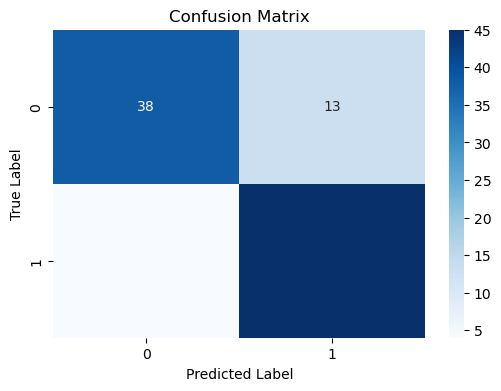

In [33]:
# Create and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix.png')
#plt.close()
plt.show()

In [35]:
(38+45)/(38+45+13+5)

0.8217821782178217

In [36]:
# Step 8: Tune hyperparameters
# Define parameter grid for GaussianNB (var_smoothing is the main parameter to tune)
param_grid = {
    'var_smoothing': np.logspace(0, -9, num=10)
}

In [37]:
# Perform grid search
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train_scale, y_train)

,estimator,GaussianNB()
,param_grid,"{'var_smoothing': array([1.e+00...e-08, 1.e-09])}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,priors,None


In [38]:
# Get best model
best_model = grid_search.best_estimator_
print("\nBest Parameters:", grid_search.best_params_)
print("Best Cross-validation Score:", grid_search.best_score_)



Best Parameters: {'var_smoothing': 1.0}
Best Cross-validation Score: 0.8549999999999999


In [41]:
# Step 9: Evaluate tuned model
# Make predictions with tuned model
y_pred_tuned = best_model.predict(x_test_scale)

In [42]:
# Calculate accuracy for tuned model
tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
print("\nTuned Model Accuracy:", tuned_accuracy)
print("\nTuned Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))


Tuned Model Accuracy: 0.83

Tuned Model Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        51
           1       0.78      0.92      0.84        49

    accuracy                           0.83       100
   macro avg       0.84      0.83      0.83       100
weighted avg       0.84      0.83      0.83       100



In [43]:
# Step 10: Save model
# Save the trained model, scaler, and label encoder
joblib.dump(best_model, 'naive_bayes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(le, 'label_encoder.pkl')
print("\nModel, scaler, and label encoder saved successfully")


Model, scaler, and label encoder saved successfully


In [44]:
# Step 11: Test the model on unseen data
# Create a sample unseen data point with the same features as training data
unseen_data = pd.DataFrame({
    'grade': ['A'],
    'cgpa': [7.5],
    'iq': [100],
    'communication': [8],
    'technical_knowledge': [7]
})

In [45]:
# Preprocess unseen data
unseen_data['grade'] = le.transform(unseen_data['grade'])
unseen_data_scaled = scaler.transform(unseen_data)

In [46]:
# Make prediction on unseen data
prediction = best_model.predict(unseen_data_scaled)
print("\nPrediction for unseen data:", "Placed" if prediction[0] == 1 else "Not Placed")


Prediction for unseen data: Placed


In [47]:
# Print prediction probability
proba = best_model.predict_proba(unseen_data_scaled)
print("Prediction Probability [Not Placed, Placed]:", proba[0])

Prediction Probability [Not Placed, Placed]: [0.2390624 0.7609376]


In [48]:
nb = joblib.load('naive_bayes_model.pkl')